<a href="https://www.kaggle.com/code/alimohamed01/house-pricing?scriptVersionId=152603905" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing Data

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# EDA

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

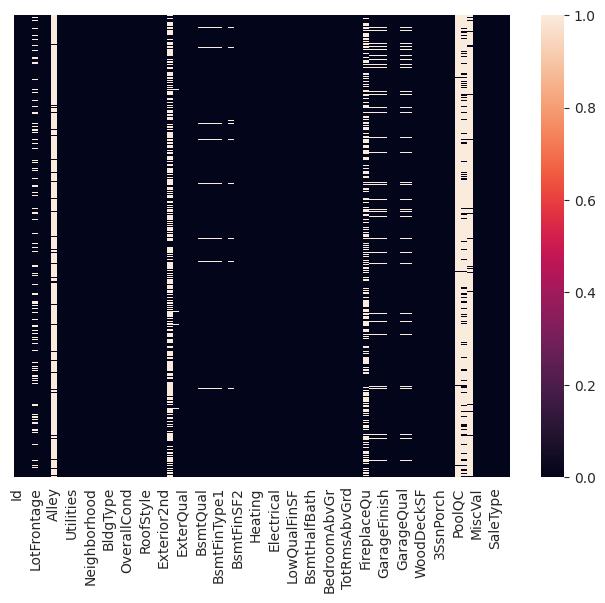

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.isna(),yticklabels=False)
plt.show()

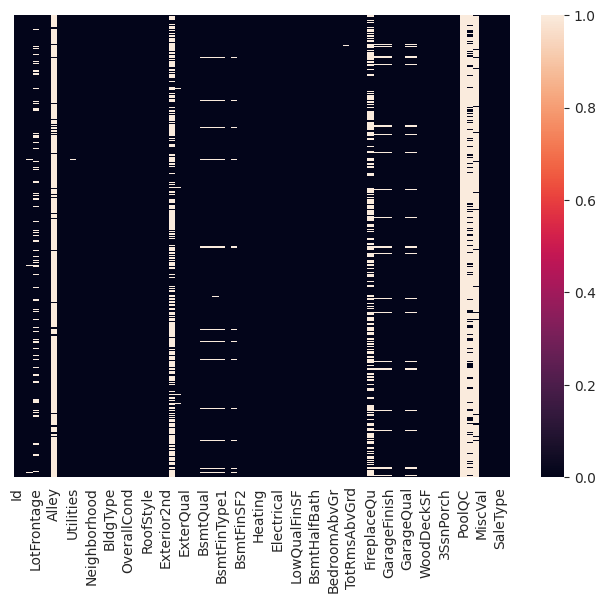

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(test.isna(),yticklabels=False)
plt.show()

# Preprocessing Data

## Dealing with Missing Values in trian Dataset

In [8]:
train.isna().sum()[train.isna().sum()/1460>0.0001]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# train.select_dtypes(include=['object']).columns

In [10]:
# train.columns.sort_values()

### Droping Missing values in train dataset

In [11]:
train.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley","Id"],axis=1,inplace=True)

### Fill Missing values in train dataset

In [12]:
#  intger anf float values
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].mean())
train["MasVnrArea"] = train["MasVnrArea"].fillna(train["MasVnrArea"].mean())
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean())

In [13]:
# categorical values
train["MasVnrType"] = train["MasVnrType"].fillna(train["MasVnrType"].mode()[0])
train["BsmtExposure"] = train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0])
train["BsmtQual"] = train["BsmtQual"].fillna(train["BsmtQual"].mode()[0])
train["BsmtCond"] = train["BsmtCond"].fillna(train["BsmtCond"].mode()[0])
train["BsmtFinType1"] = train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0])
train["BsmtFinType2"] = train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0])
train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])
train["GarageType"] = train["GarageType"].fillna(train["GarageType"].mode()[0])
train["GarageFinish"] = train["GarageFinish"].fillna(train["GarageFinish"].mode()[0])
train["GarageQual"] = train["GarageQual"].fillna(train["GarageQual"].mode()[0])
train["GarageCond"] = train["GarageCond"].fillna(train["GarageCond"].mode()[0])

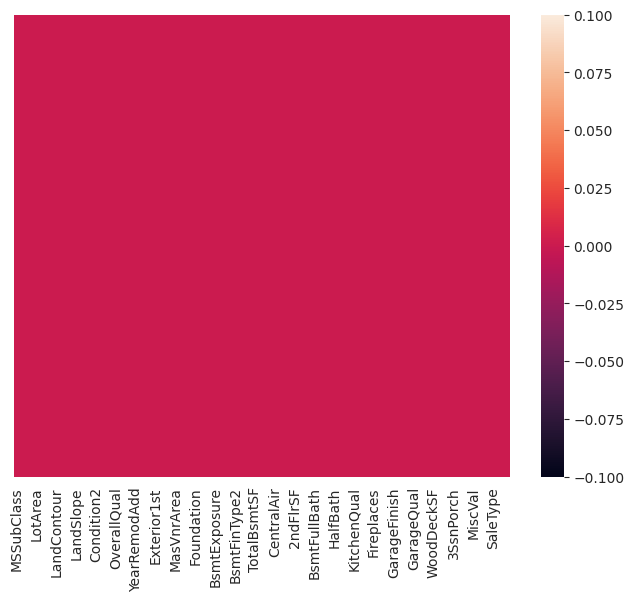

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.isna(),yticklabels=False)
plt.show()

## Dealing with Missing Values in Test Dataset

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
test.isnull().sum()[test.isnull().sum()/1460>0.4]

Alley          1352
MasVnrType      894
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

### Droping Missing values in test dataset

In [17]:
test.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley"],axis=1,inplace=True)

### Fill Missing values in test dataset

In [18]:
#  intger anf float values
test["LotFrontage"] = test["LotFrontage"].fillna(test["LotFrontage"].mean())
test["MasVnrArea"] = test["MasVnrArea"].fillna(test["MasVnrArea"].mean())
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean())
test["GarageArea"] = test["GarageArea"].fillna(test["GarageArea"].mean())
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean())

In [19]:
# categorical values
test["MSZoning"] = test["MSZoning"].fillna(test["MSZoning"].mode()[0])
test["MasVnrType"] = test["MasVnrType"].fillna(test["MasVnrType"].mode()[0])
test["BsmtExposure"] = test["BsmtExposure"].fillna(test["BsmtExposure"].mode()[0])
test["BsmtQual"] = test["BsmtQual"].fillna(test["BsmtQual"].mode()[0])
test["BsmtCond"] = test["BsmtCond"].fillna(test["BsmtCond"].mode()[0])
test["BsmtFinType1"] = test["BsmtFinType1"].fillna(test["BsmtFinType1"].mode()[0])
test["BsmtFinType2"] = test["BsmtFinType2"].fillna(test["BsmtFinType2"].mode()[0])
test["GarageType"] = test["GarageType"].fillna(test["GarageType"].mode()[0])
test["GarageFinish"] = test["GarageFinish"].fillna(test["GarageFinish"].mode()[0])
test["GarageQual"] = test["GarageQual"].fillna(test["GarageQual"].mode()[0])
test["GarageCond"] = test["GarageCond"].fillna(test["GarageCond"].mode()[0])
test["Utilities"] = test["Utilities"].fillna(test["Utilities"].mode()[0])
test["Exterior1st"] = test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test["Exterior2nd"] = test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mode()[0])
test["SaleType"] = test["SaleType"].fillna(test["SaleType"].mode()[0])
test["GarageCars"] = test["GarageCars"].fillna(test["GarageCars"].mode()[0])
test["Functional"] = test["Functional"].fillna(test["Functional"].mode()[0])
test["KitchenQual"] = test["KitchenQual"].fillna(test["KitchenQual"].mode()[0])
test["BsmtHalfBath"] = test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0])
test["BsmtFullBath"] = test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0])
test["BsmtUnfSF"] = test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mode()[0])
test["BsmtFinSF2"] = test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mode()[0])
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mode()[0])
test["BsmtFinSF1"] = test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mode()[0])
test["MasVnrType"] = test["MasVnrType"].fillna(test["MasVnrType"].mode()[0])

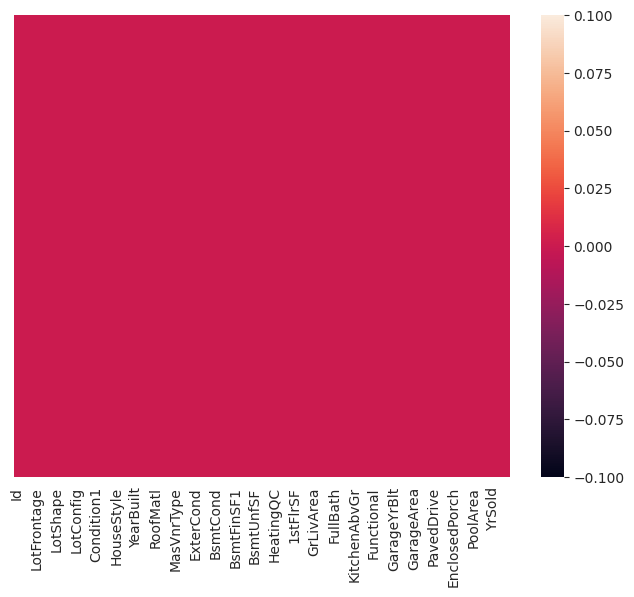

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(test.isna(),yticklabels=False)
plt.show()

In [21]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [22]:
test_copy = test.copy()

In [23]:
# drop id in test_copy
test_copy.drop("Id",axis=1,inplace=True)
# test_copy.info()

In [24]:
train_copy = train.copy()

In [25]:
test_copy.shape

(1459, 74)

In [26]:
train_copy.shape

(1460, 75)

In [27]:
# sns.pairplot(train, diag_kind='kde')  # You can use 'hist' or 'kde' for the diagonal plots
# plt.show()

## Concatination Test and Train Dataset


In [28]:
final_df=pd.concat([train_copy,test_copy],axis=0)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

## Dummy Encoding

In [30]:
def onehot_encode_categorical_features(df):
    # Get a list of all columns with categorical data
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Use pd.get_dummies to one-hot encode each categorical column
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    return df_encoded

In [31]:
# Encoding Train Dataset
encoded_final_df = onehot_encode_categorical_features(final_df)
encoded_final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [32]:
encoded_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 232 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(195), float64(12), int64(25)
memory usage: 1.4 MB


## Splitting Data

In [33]:
df_Train=encoded_final_df.iloc[:1459,:]
df_Test=encoded_final_df.iloc[1459:,:]

In [34]:
df_Train.shape

(1459, 232)

In [35]:
df_Test.shape

(1460, 232)

In [36]:
df_Test.drop(["SalePrice"],axis=1,inplace=True)

/tmp/ipykernel_20/3012790261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(["SalePrice"],axis=1,inplace=True)


In [37]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Build and Test Model 

In [38]:
import xgboost
classifier=xgboost.XGBRegressor()

In [39]:
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prediction

In [40]:
y_pred = classifier.predict(df_Test)
y_pred

array([157472.11, 125018.93, 164988.94, ..., 169048.52, 111395.08,
       226334.88], dtype=float32)

In [41]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']

# Drop the last row where either 'Id' or 'SalePrice' is NaN
datasets = datasets.dropna(subset=['Id', 'SalePrice'], how='any')
# Reset the index after dropping rows
datasets.reset_index(drop=True, inplace=True)
# Replace non-numeric values with a specific value (e.g., -1)
datasets['Id'] = pd.to_numeric(datasets['Id'], errors='coerce').fillna(-1).astype('Int32')

datasets.to_csv('sample_submission23.csv',index=False)

In [42]:
sub = pd.read_csv("/kaggle/working/sample_submission23.csv")
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


# Evaluation

In [43]:
# Cross- Validation
# from sklearn.model_selection import cross_val_score
# cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
# mean_score = -cross_val_scores.mean()  # Note the negation due to 'neg_mean_squared_error'
# std_score = cross_val_scores.std()

# Print the cross-validation results
# print(f'Cross-Validation Mean Score: {mean_score}')
# print(f'Cross-Validation Standard Deviation: {std_score}')

# Model Deployment

In [44]:
import pickle
filename = 'house_pricing_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

# Thanks